In [1]:
import numpy as np
import pandas as pd

In [5]:
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin-1')


In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2493,ham,they released another Italian one today and it...,NaN,NaN,NaN
5218,ham,I accidentally brought em home in the box,NaN,NaN,NaN
1994,ham,Have you been practising your curtsey?,NaN,NaN,NaN
2440,ham,"Great. I'm in church now, will holla when i ge...",NaN,NaN,NaN
4688,ham,"Didn't try, g and I decided not to head out",NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [9]:
# 1. Data Cleaning
# 2. EDA
# 3. Text PreProcessing
# 4. Model Buildng
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [12]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.rename(columns = {'v1':'target','v2':'text'}, inplace = True)

In [14]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [18]:
df['target'] = encoder.fit_transform(df['target'])

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
## missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [21]:
# duplicate values
df.duplicated().sum()

403

In [22]:
df = df.drop_duplicates(keep='first')

In [23]:
df.duplicated().sum()

0

In [24]:
df.shape

(5169, 2)

# 2. EDA

In [25]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

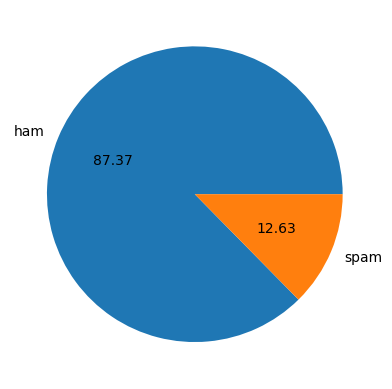

In [26]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [27]:
# Data is imbalanced

In [36]:
!pip install nltk

In [37]:
import nltk

In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Vishwajeet
[nltk_data]     Walekar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
df['num_characters'] = df['text'].apply(len)

In [39]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
# number of words

In [43]:
nltk.download('punkt_tab')  # newer NLTK versions expect this to

[nltk_data] Downloading package punkt_tab to C:\Users\Vishwajeet
[nltk_data]     Walekar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [46]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [47]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [48]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [49]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [50]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [52]:
# ham messages
df[df['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [53]:
# spam messages
df[df['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [54]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

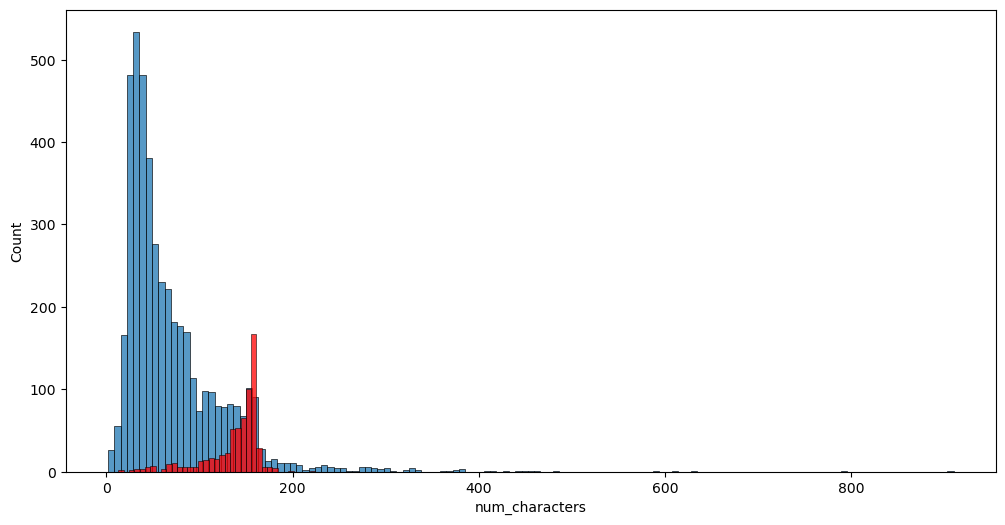

In [58]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color= 'red')

<Axes: xlabel='num_words', ylabel='Count'>

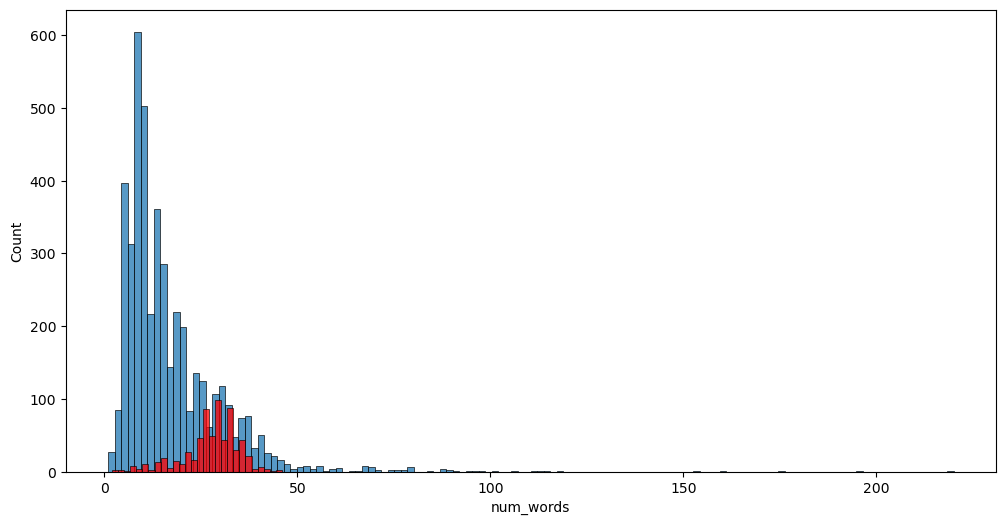

In [59]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color= 'red')

<Axes: xlabel='num_sentence', ylabel='Count'>

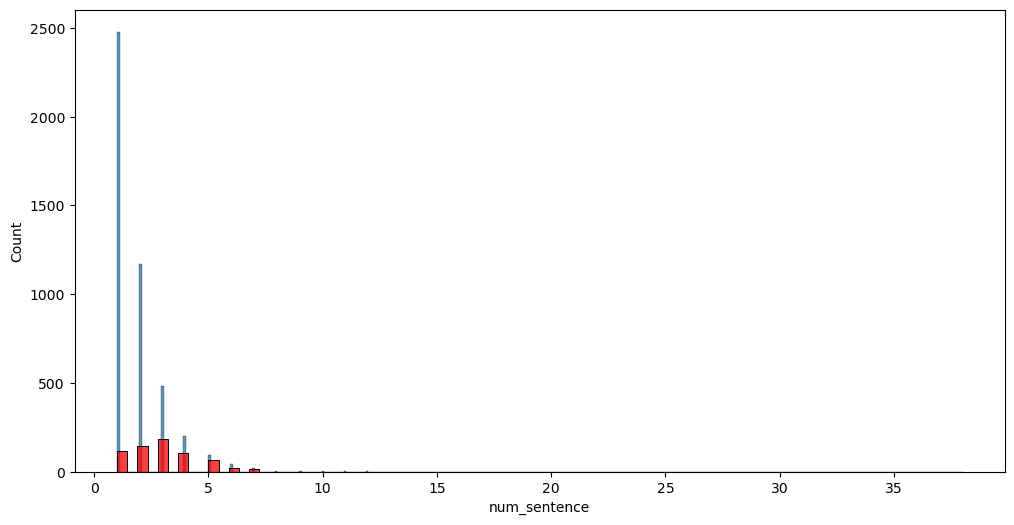

In [60]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['num_sentence'])
sns.histplot(df[df['target'] == 1]['num_sentence'], color= 'red')

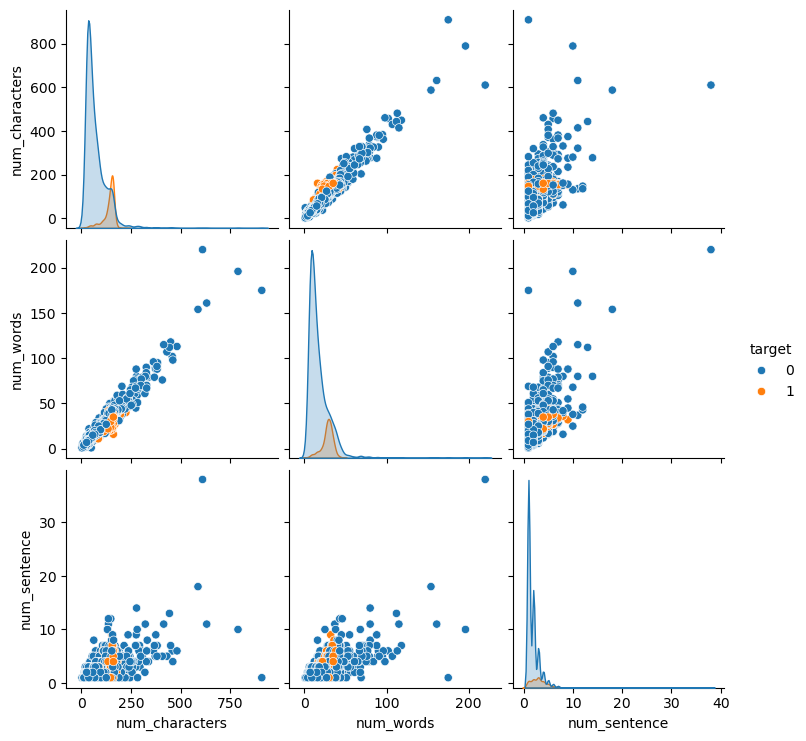

In [61]:
sns.pairplot(df,hue='target')

<Axes: >

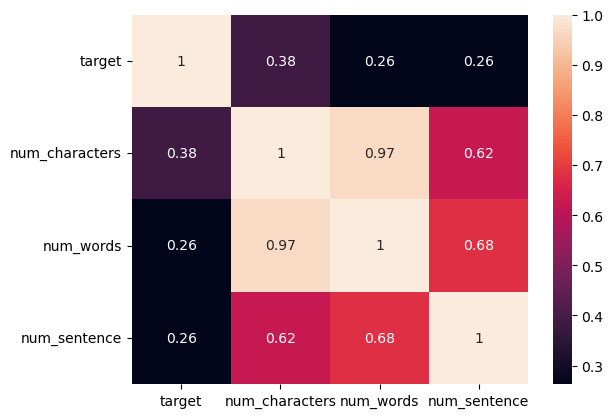

In [65]:
sns.heatmap(df.drop(['text'], axis=1).corr(), annot= True)

# 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuations
- Stemming

In [93]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    test = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [90]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('doing')

'do'

In [81]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Vishwajeet
[nltk_data]     Walekar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [82]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [83]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [94]:
transform_text('HI HOW 80 ARE, . ?/ ** **% $$ %^ &YOU vishwajeet nilesh, congrats win lottery')

'hi how 80 are you vishwajeet nilesh congrat win lotteri'

In [102]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'i gon na be home soon and i do want to talk about thi stuff anymor tonight k i cri enough today'

In [101]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [104]:
df['transformed_text'] = df['text'].apply(transform_text)

In [105]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [111]:
!pip install wordcloud

In [121]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size=10, background_color='white')

In [122]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

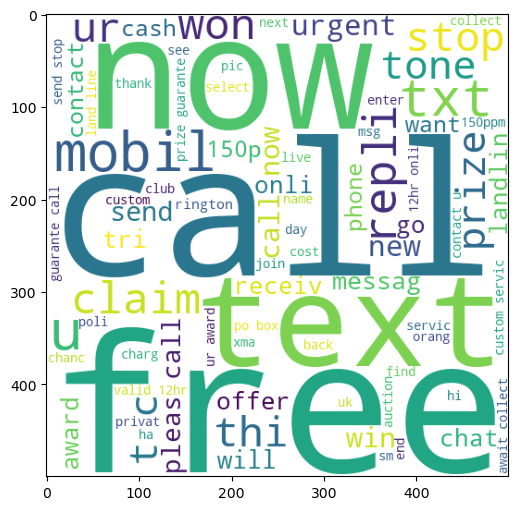

In [124]:
plt.figure(figsize= (15,6))
plt.imshow(spam_wc)

In [125]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

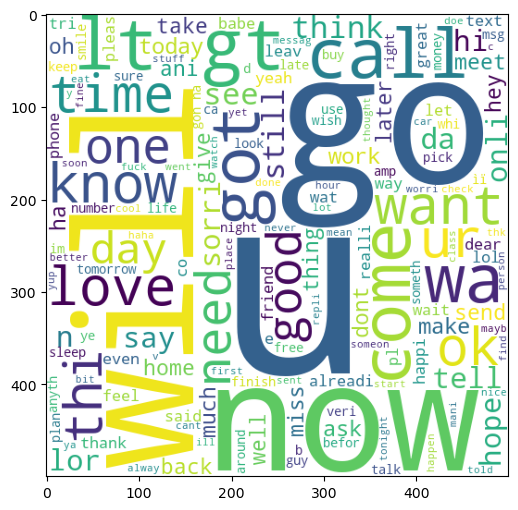

In [126]:
plt.figure(figsize= (15,6))
plt.imshow(ham_wc)

In [133]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [134]:
spam_corpus

['free',
 'entri',
 'in',
 '2',
 'a',
 'wkli',
 'comp',
 'to',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 'to',
 '87121',
 'to',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 't',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'there',
 'darl',
 'it',
 'been',
 '3',
 'week',
 'now',
 'and',
 'no',
 'word',
 'back',
 'i',
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'to',
 'send',
 'to',
 'rcv',
 'winner',
 'as',
 'a',
 'valu',
 'network',
 'custom',
 'you',
 'have',
 'been',
 'select',
 'to',
 'receivea',
 'prize',
 'reward',
 'to',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'onli',
 'had',
 'your',
 'mobil',
 '11',
 'month',
 'or',
 'more',
 'u',
 'r',
 'entitl',
 'to',
 'updat',
 'to',
 'the',
 'latest',
 'colour',
 'mobil',
 'with',
 'camera',
 'for',
 'free',
 'call',
 'the',
 'mobil',
 'updat',
 'co',
 'free',
 'on',
 '08002986030',


In [135]:
len(spam_corpus)

14475

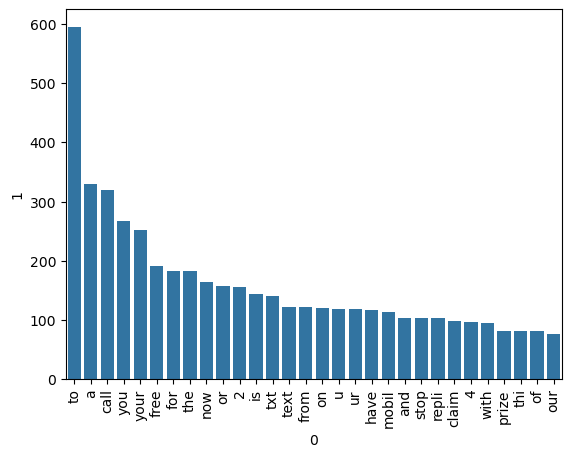

In [142]:
from collections import Counter
sns.barplot(x= pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation= 'vertical')
plt.show()

In [143]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [144]:
len(ham_corpus)

62812

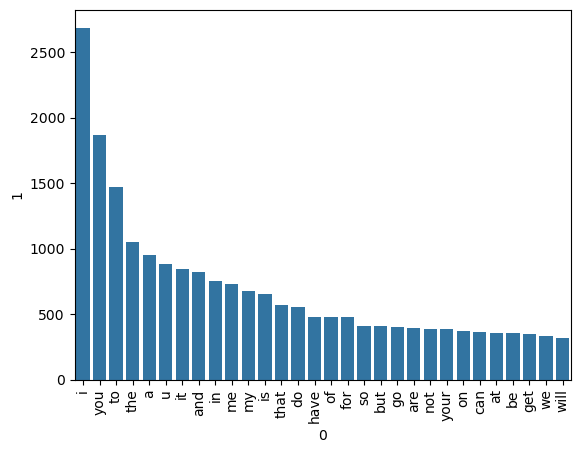

In [145]:
from collections import Counter
sns.barplot(x= pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation= 'vertical')
plt.show()

# 4. Model Building

In [174]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features= 3000)

In [175]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [176]:
X.shape

(5169, 3000)

In [177]:
y = df['target'].values

In [178]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 2)

In [180]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [181]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [182]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [183]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8771760154738878
[[792 104]
 [ 23 115]]
0.5251141552511416


In [187]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9680851063829787
[[896   0]
 [ 33 105]]
1.0


In [185]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9806576402321083
[[893   3]
 [ 17 121]]
0.9758064516129032


# tfidf --> mnb

In [186]:
# Model Improvement
# 1. change the max+features parameter in tfidf vectorizer

In [189]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))